![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

- When was the global search for 'workout' at its peak?

In [100]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time as tm
import pytz

In [101]:
workout_df = pd.read_csv('C:/Users/Morsi Store DZ/AI/fitness_studio/workspace/data/workout.csv')
workout_df.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [102]:
workout_peak = workout_df['workout_worldwide'].max()
print(workout_peak)
year_str = workout_df[workout_df['workout_worldwide']==workout_peak]
year_str = year_str['month'].str[:4].iloc[0]
print(year_str)

100
2020


- Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now?

In [103]:
three_keywords = pd.read_csv('C:/Users/Morsi Store DZ/AI/fitness_studio/workspace/data/three_keywords.csv',parse_dates=['month'])
#print(type(three_keywords))
three_keywords.head()
#time = pd.to_datetime(three_keywords['month'])
covid_three_keywords = three_keywords[(three_keywords['month']>='2019-01-01') & (three_keywords['month']<='2022-12-01')]
#covid_three_keywords.head()
covid_three_keywords.describe()


,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
count,48,48.000000,48.000000,48.000000
mean,2020-12-15 17:00:00,17.520833,15.916667,14.583333
min,2019-01-01 00:00:00,10.000000,10.000000,9.000000
25%,2019-12-24 06:00:00,12.000000,14.000000,11.000000
50%,2020-12-16 12:00:00,14.000000,16.000000,13.000000
75%,2021-12-08 18:00:00,19.000000,17.000000,17.250000
max,2022-12-01 00:00:00,82.000000,21.000000,34.000000
std,NaN,11.465006,2.525052,5.414061


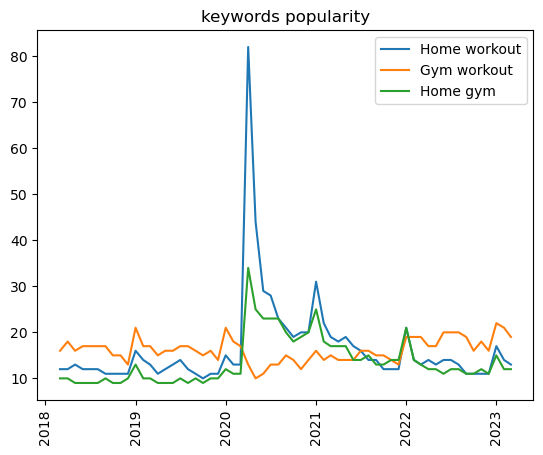

In [106]:
peak_covid = 'Home workout'

plt.plot(three_keywords["month"], three_keywords["home_workout_worldwide"], label="Home workout")
plt.plot(three_keywords["month"], three_keywords["gym_workout_worldwide"], label="Gym workout")
plt.plot(three_keywords["month"], three_keywords["home_gym_worldwide"], label="Home gym")
plt.xticks(rotation=90)
plt.title('keywords popularity')
plt.legend()
plt.show()

current  = 'Gym workout'


- What country has the highest interest for workouts among the following: United States, Australia, or Japan?

In [107]:
workout_geo = pd.read_csv('C:/Users/Morsi Store DZ/AI/fitness_studio/workspace/data/workout_geo.csv')
workout_geo.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


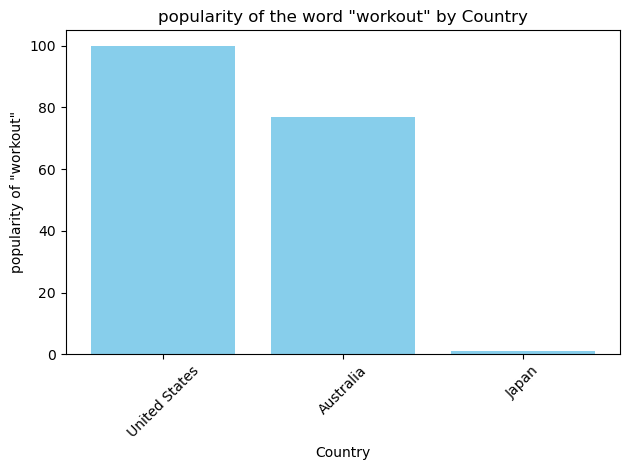

In [124]:
countries = workout_geo[workout_geo['country'].isin(['United States', 'Australia', 'Japan'])]
countries
plt.bar(countries['country'], countries['workout_2018_2023'], color='skyblue')  # You can change the color
plt.xlabel('Country')
plt.ylabel('popularity of "workout"')
plt.title('popularity of the word "workout" by Country')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout for better fit
plt.show()

In [125]:
top_country = 'United States'

- You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts?